In [2]:
import datetime
import xarray as xr

In [ ]:
xr.Dataset.rename()

In [ ]:
xr.Dataset.transpose()

In [4]:
def _time_to_timestr(arr):
    return ['{%Y-%m-%d_%H:%M:%S}'.format(t) for t in arr]

In [19]:
%pdb

Automatic pdb calling has been turned OFF


In [29]:
times = [datetime.datetime(2017, 5, 1) + datetime.timedelta(hours=h) for h in range(26)]
timestr = ['{time:%Y-%m-%d_%H:%M:%S}'.format(time=t) for t in times]
timearr = xr.DataArray(timestr, {'Time': times}, ['Time'])
timearr.to_netcdf('testtime.nc', encoding={'Time': {'dtype': 'S1'}})
timeds = timearr.to_dataset(name='TIME')
timeds.sel(Time='2017-05-02')

<xarray.Dataset>
Dimensions:  (Time: 2)
Coordinates:
  * Time     (Time) datetime64[ns] 2017-05-02 2017-05-02T01:00:00
Data variables:
    TIME     (Time) <U19 '2017-05-02_00:00:00' '2017-05-02_01:00:00'

In [ ]:
timeds.sel()

In [23]:
timearr.to_dataset(name='bla').dims['Time']

12

In [11]:
!ncdump -h testtime.nc

*** ncdump: ncopen failed on testtime.nc


In [17]:
import tempfile
tempfile.mktemp()

In [34]:
ATTRS_WRFCHEMI = [
    'TITLE', 'START_DATE', 'WEST-EAST_GRID_DIMENSION',
    'SOUTH-NORTH_GRID_DIMENSION', 'BOTTOM-TOP_GRID_DIMENSION', 'DX', 'DY',
    'CEN_LAT', 'CEN_LON', 'TRUELAT1', 'TRUELAT2', 'MOAD_CEN_LAT', 'STAND_LON',
    'MAP_PROJ', 'MMINLU']

In [37]:
from netCDF4 import Dataset
with Dataset('/home2/hilboll/tmp/emiprep/wrfinput_d02', 'r') as nc:
    keys = [a_ for a_ in nc.ncattrs() if a_ in ATTRS_WRFCHEMI]
    attrs = {a_: getattr(nc, a_) for a_ in keys}
attrs

{'BOTTOM-TOP_GRID_DIMENSION': 44,
 'CEN_LAT': 51.971008,
 'CEN_LON': 4.927002,
 'DX': 3000.0,
 'DY': 3000.0,
 'MAP_PROJ': 1,
 'MMINLU': 'USGS',
 'MOAD_CEN_LAT': 51.971008,
 'SOUTH-NORTH_GRID_DIMENSION': 211,
 'STAND_LON': 4.927,
 'START_DATE': '2016-09-08_00:00:00',
 'TITLE': ' OUTPUT FROM REAL_EM V3.9.1.1 PREPROCESSOR',
 'TRUELAT1': 52.971001,
 'TRUELAT2': 50.971001,
 'WEST-EAST_GRID_DIMENSION': 211}

In [39]:
import sys
sys.path.append('/home2/hilboll/code/emiprep/')

In [40]:
from emiprep.regrid.cdo import metgrid_to_cdo_griddes

In [43]:
%pdb

Automatic pdb calling has been turned ON


In [45]:
ssgrid = metgrid_to_cdo_griddes('/home2/hilboll/tmp/emiprep/wrfinput_d02')

ValueError: cannot rename 'XLAT_M' because it is not a variable or dimension in this dataset

> /home2/hilboll/.local/easybuild/software/Anaconda3/4.2.0/envs/emiprep_dev/lib/python3.6/site-packages/xarray/core/dataset.py(1530)rename()
   1528             if k not in self and k not in self.dims:
   1529                 raise ValueError("cannot rename %r because it is not a "
-> 1530                                  "variable or dimension in this dataset" % k)
   1531             if v in self and k != v:
   1532                 raise ValueError('the new name %r already exists' % v)

ipdb> u
> /home2/hilboll/code/emiprep/emiprep/regrid/cdo.py(52)_metgrid_to_cdo_grid_info_extraction()
     50 
     51     ds = xr.open_dataset(fn_metgrid)
---> 52     ds.rename(METGRID_SCRIP_TRANSFORM, inplace=True)
     53 
     54     lat_center = ds['grid_center_lat'][0]

ipdb> ds['XLAT']
<xarray.DataArray 'XLAT' (Time: 1, south_north: 210, west_east: 210)>
array([[[ 49.068565,  49.070156, ...,  49.070156,  49.068565],
        [ 49.095474,  49.097057, ...,  49.097057,  49.095474],
        ..., 
  

In [46]:
tmpwrfi = xr.open_dataset('/home2/hilboll/tmp/emiprep/wrfinput_d02')
tmpwrfm = xr.open_dataset('/home2/hilboll/tmp/emiprep/met_em.d02.2016-09-01_00:00:00.nc')

In [81]:
tmpwrfi.coords['asdf'] = 1

In [83]:
tmpwrfi.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 49.0686 49.0702 49.0717 ...
    XLONG    (Time, south_north, west_east) float32 0.625214 0.66629 ...
    XLAT_U   (Time, south_north, west_east_stag) float32 49.0678 49.0694 ...
    XLONG_U  (Time, south_north, west_east_stag) float32 0.604675 0.645752 ...
    XLAT_V   (Time, south_north_stag, west_east) float32 49.0551 49.0567 ...
    XLONG_V  (Time, south_north_stag, west_east) float32 0.626434 0.66748 ...
    asdf     int64 1

In [2]:
import pandas as pd
pd.DataFrame.assign()

TypeError: assign() missing 1 required positional argument: 'self'

In [50]:
import numpy as np

In [51]:
np.testing.assert_array_equal( tmpwrfm['XLAT_M'].values, tmpwrfi['XLAT'].values)

In [53]:
tmpwrfi.attrs = {1:2, 4:5}

In [55]:
tmpwrfi.attrs

OrderedDict([(1, 2), (4, 5)])

In [56]:
import pandas as pd

In [76]:
countries = ['D', 'F']
sectors = [11, 71]
species = ['NO2', 'CO']
weekday = np.arange(1, 8, dtype=int)

In [77]:
ix_w = pd.MultiIndex.from_product((countries, sectors, species, weekday))
cy_w = pd.DataFrame(ix_w.to_frame().values,                              
                    columns=['country', 'sect', 'species', 'weekday'])   
cy_w['weight_weekday'] = 1.0                                             

In [78]:
cy_w

country sect species weekday  weight_weekday
0        D   11     NO2       1             1.0
1        D   11     NO2       2             1.0
2        D   11     NO2       3             1.0
3        D   11     NO2       4             1.0
4        D   11     NO2       5             1.0
5        D   11     NO2       6             1.0
6        D   11     NO2       7             1.0
7        D   11      CO       1             1.0
8        D   11      CO       2             1.0
9        D   11      CO       3             1.0
10       D   11      CO       4             1.0
11       D   11      CO       5             1.0
12       D   11      CO       6             1.0
13       D   11      CO       7             1.0
14       D   71     NO2       1             1.0
15       D   71     NO2       2             1.0
16       D   71     NO2       3             1.0
17       D   71     NO2       4             1.0
18       D   71     NO2       5             1.0
19       D   71     NO2       6             1.0
20       D   71     NO2       7             1.0
21       D   71      CO       1             1.0
22       D   71      CO       2             1.0
23       D   71      CO       3             1.0
24       D   71      CO       4             1.0
25       D   71      CO       5             1.0
26       D   71      CO       6             1.0
27       D   71      CO       7             1.0
28       F   11     NO2       1             1.0
29       F   11     NO2       2             1.0
30       F   11     NO2       3             1.0
31       F   11     NO2       4             1.0
32       F   11     NO2       5             1.0
33       F   11     NO2       6             1.0
34       F   11     NO2       7             1.0
35       F   11      CO       1             1.0
36       F   11      CO       2             1.0
37       F   11      CO       3             1.0
38       F   11      CO       4             1.0
39       F   11      CO       5             1.0
40       F   11      CO       6             1.0
41       F   11      CO       7             1.0
42       F   71     NO2       1             1.0
43       F   71     NO2       2             1.0
44       F   71     NO2       3             1.0
45       F   71     NO2       4             1.0
46       F   71     NO2       5             1.0
47       F   71     NO2       6             1.0
48       F   71     NO2       7             1.0
49       F   71      CO       1             1.0
50       F   71      CO       2             1.0
51       F   71      CO       3             1.0
52       F   71      CO       4             1.0
53       F   71      CO       5             1.0
54       F   71      CO       6             1.0
55       F   71      CO       7             1.0

In [3]:
PATH_INVENTORY_NL = '/home2/hilboll/dat/emissions/TNO-MACC_III/NL/20160322_OutputForExport_HighResolution_1x1km_for_NLD.txt'


In [4]:
emis = pd.read_csv(PATH_INVENTORY_NL, sep=';')
emis.drop('Year', axis=1, inplace=True)
emis.rename(
    columns={'Lon': 'lon', 'Lat': 'lat', 'ISO3': 'country',
             'SNAP': 'sect', 'SourceType': 'a_p'},
    inplace=True)
emis.head()

lon        lat country  sect a_p  CH4        CO       NH3     NMVOC  \
0  3.304687  51.397321     NLD     8   A  0.0  0.201213  0.000000  0.020924   
1  3.304687  51.406250     NLD     8   A  0.0  0.603641  0.000000  0.062774   
2  3.304687  51.424107     NLD     8   A  0.0  0.162708  0.000203  0.052717   
3  3.304687  51.433035     NLD     8   A  0.0  0.497451  0.000621  0.161174   
4  3.304687  51.441964     NLD     8   A  0.0  0.041231  0.000051  0.013359   

        NOX      PM10     PM2_5       SO2  
0  0.021719  0.000485  0.000464  0.000004  
1  0.065159  0.001455  0.001394  0.000014  
2  1.199977  0.028474  0.027050  0.000386  
3  3.668707  0.087054  0.082701  0.001181  
4  0.304085  0.007215  0.006854  0.000097

In [14]:
x = emis['lon'][emis['a_p'] == 'A'].unique()

In [15]:
y = emis['lat'][emis['a_p'] == 'A'].unique()

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
import numpy as np
xx, yy = np.meshgrid(x, y)

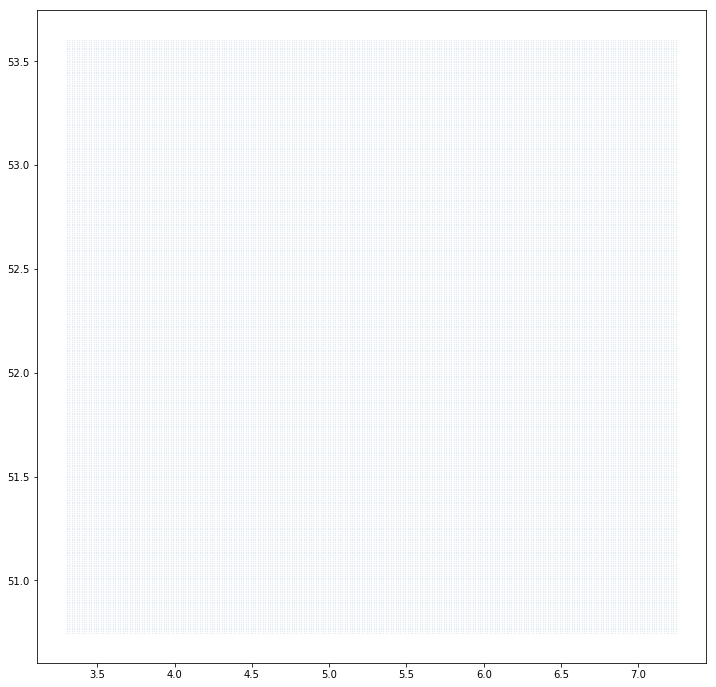

In [23]:
plt.figure(figsize=(12, 12))
plt.plot(xx.ravel(), yy.ravel(), '.', ms=.1)

In [43]:
def coords_to_griddes(arr):
    if len(arr.shape) != 1:
        raise ValueError()
    arr_ = np.sort(arr)
    diff_ = np.diff(arr_)
    diff__ = np.diff(diff_)
    if not np.allclose(diff__, 0.):
        raise ValueError()
    n = arr.size
    x0 = arr_[0]
    d = diff_[0]
    return n, x0, d

In [37]:
np.allclose(a)

TypeError: allclose() missing 1 required positional argument: 'b'

In [44]:
a = coords_to_griddes(x)
a

(253, 3.3046870000000004, 0.015625)

In [54]:
y.size, np.sort(x), np.diff(np.sort(x))

(321, array([ 3.304687,  3.320312,  3.335937,  3.351562,  3.367187,  3.382812,
         3.398437,  3.414062,  3.429687,  3.445312,  3.460937,  3.476562,
         3.492187,  3.507812,  3.523437,  3.539062,  3.554687,  3.570312,
         3.585937,  3.601562,  3.617187,  3.632812,  3.648437,  3.664062,
         3.679687,  3.695312,  3.710937,  3.726562,  3.742187,  3.757812,
         3.773437,  3.789062,  3.804687,  3.820312,  3.835937,  3.851562,
         3.867187,  3.882812,  3.898437,  3.914062,  3.929687,  3.945312,
         3.960937,  3.976562,  3.992187,  4.007812,  4.023437,  4.039062,
         4.054687,  4.070312,  4.085937,  4.101562,  4.117187,  4.132812,
         4.148437,  4.164062,  4.179687,  4.195312,  4.210937,  4.226562,
         4.242187,  4.257812,  4.273437,  4.289062,  4.304687,  4.320312,
         4.335937,  4.351562,  4.367187,  4.382812,  4.398437,  4.414062,
         4.429687,  4.445312,  4.460937,  4.476562,  4.492187,  4.507812,
         4.523437,  4.539062,  4.

In [ ]:
pd.Dat

In [51]:
np.round(3.3046870000000004, 1)

3.2999999999999998

In [52]:
import math
math.radians

<module 'math' from '/home2/hilboll/.local/easybuild/software/Anaconda3/4.2.0/envs/emiprep_dev/lib/python3.6/lib-dynload/math.cpython-36m-x86_64-linux-gnu.so'>

# Reading lat/lon coords from griddes file


In [58]:
!head -n5 targetgrid.txt

gridtype  = curvilinear
gridsize  = 44100
xsize     = 210
ysize     = 210
xvals     = -12.1618347 -12.0041809 -11.8463440 -11.6883545 -11.5302124 -11.3719177 -11.2134705 -11.0548401 -10.8960876 -10.7371521


In [95]:
def read_griddes(path):
    with open(path, 'r') as fd:
        lines = fd.readlines()
    splitlines = [l.split('=') for l in lines]
    lenghts = [len(l) for l in splitlines]
    indices = [i for i, k in enumerate(splitlines) if lenghts[i] == 2] + [len(lines)]
    keys = [k[0].strip() for i, k in enumerate(splitlines) if lenghts[i] == 2]
    datalines = [l[1] if len(l) == 2 else l[0] for l in splitlines]
    data = {}
    for j in range(len(keys)):
        key = keys[j]
        if key in ['gridtype']:
            data[key] = datalines[indices[j]].strip()
        elif key in ['gridsize', 'xsize', 'ysize']:
            data[key] = int(datalines[indices[j]].strip())
        else:
            values = []
            for i in range(indices[j], indices[j + 1]):
                values.append(np.fromstring(datalines[i].strip(), sep=' '))
            data[key] = np.concatenate(values)
        
    return data

In [96]:
ll = read_griddes('targetgrid.txt')
ll

{'gridsize': 44100,
 'gridtype': 'curvilinear',
 'xbounds': array([-12.2216797, -12.06427  , -12.1018066, ...,  36.3093872,
         36.4309692,  36.166626 ]),
 'xsize': 210,
 'xvals': array([-12.1618347, -12.0041809, -11.846344 , ...,  35.7085266,
         35.9737854,  36.2381897]),
 'ybounds': array([ 36.3083229,  36.3386536,  36.4655418, ...,  62.8295288,
         62.9496155,  63.0048866]),
 'ysize': 210,
 'yvals': array([ 36.3869476,  36.4171715,  36.4471359, ...,  63.0267105,
         62.9721985,  62.9172363])}

In [79]:
len(ll['xbounds'])

22059

In [75]:
[l.split('=') for l in ll]

[['gridtype  '],
 ['gridsize  '],
 ['xsize     '],
 ['ysize     '],
 ['xvals     '],
 ['xbounds   '],
 ['yvals     '],
 ['ybounds   ']]

In [87]:
teststring = ' -12.1618347 -12.0041809 -11.8463440 -11.6883545 -11.5302124 -11.3719177 -11.2134705 -11.0548401 -10.8960876 -10.7371521\n'
np.fromstring(teststring.strip(), sep=' ')


array([-12.1618347, -12.0041809, -11.846344 , -11.6883545, -11.5302124,
       -11.3719177, -11.2134705, -11.0548401, -10.8960876, -10.7371521])

## reshape to 2D

In [100]:
xvals = ll['xvals']
yvals = ll['yvals']
xvals.reshape(210, 210).T[0]

array([-12.1618347, -12.1996155, -12.2376099, -12.2757263, -12.3140259,
       -12.352478 , -12.3911133, -12.4299316, -12.4689026, -12.5080566,
       -12.5473633, -12.586853 , -12.6265259, -12.6663818, -12.7063904,
       -12.7466125, -12.7869873, -12.8275452, -12.8682861, -12.9092407,
       -12.9503479, -12.9916382, -13.0331421, -13.0748291, -13.1166992,
       -13.1587524, -13.2009888, -13.2434387, -13.2860718, -13.3289185,
       -13.3719482, -13.4151917, -13.4586182, -13.5022583, -13.5460815,
       -13.5901489, -13.6343689, -13.678833 , -13.7235107, -13.7683716,
       -13.8134766, -13.8587646, -13.9042664, -13.9500122, -13.9959717,
       -14.0421143, -14.088501 , -14.1351318, -14.1819458, -14.2290039,
       -14.2763062, -14.323822 , -14.3715515, -14.4195251, -14.4677429,
       -14.5162048, -14.5648804, -14.6138   , -14.6629639, -14.7123718,
       -14.7619934, -14.8118896, -14.86203  , -14.9124146, -14.9630737,
       -15.0139465, -15.065094 , -15.1165161, -15.1681519, -15.2

# Get indices in 2D curvilinear fields

In [101]:
## https://stackoverflow.com/a/41858332/152439 using sklearn

from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('haversine')

# example data
lat1, lon1 = 36.4256345, -5.1510261
lat2, lon2 = 40.4165, -3.7026
lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

X = [[lat1, lon1],
     [lat2, lon2]]
kms = 6367
print(kms * dist.pairwise(X))

ModuleNotFoundError: No module named 'sklearn'

In [124]:
import pandas as pd
import numpy as np
import dask.array as da
#from haversine import haversine

R = 6371.0  # radius of the earth in km
    
def pairwise_haversine(lon1, lat1, lon2, lat2, r_earth=None):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    # inspired by from https://stackoverflow.com/a/29546836/152439
    
    lon1, lat1, lon2, lat2 = map(lambda arr: arr if isinstance(arr, (np.ndarray, da.Array)) else arr.values, [lon1, lat1, lon2, lat2])
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2[:, np.newaxis] - np.atleast_2d(lon1)
    dlat = lat2[:, np.newaxis] - np.atleast_2d(lat1)

    a = np.sin(dlat/2.0)**2 + np.cos(np.atleast_2d(lat1)) * np.cos(lat2[:, np.newaxis]) * np.sin(dlon/2.0)**2

    c = np.arcsin(np.sqrt(a))
    if r_earth:
        c *= 2 * r_earth
    return c

In [139]:
lons1, lats1 = np.linspace(10., 80., 8), np.linspace(10., 15., 8)
lons2, lats2 = np.linspace(40., 50., 3), np.linspace(15., 19., 3)
print([(x, y) for x, y in zip(lons1, lats1)])
print([(x, y) for x, y in zip(lons2, lats2)])

[(10.0, 10.0), (20.0, 10.714285714285714), (30.0, 11.428571428571429), (40.0, 12.142857142857142), (50.0, 12.857142857142858), (60.0, 13.571428571428571), (70.0, 14.285714285714285), (80.0, 15.0)]
[(40.0, 15.0), (45.0, 17.0), (50.0, 19.0)]


In [142]:
dist = pairwise_haversine(lons1, lats1, lons2, lats2, R)
dist
np.argmin(dist, axis=0)

array([[ 3300.95002253,  2218.78396689,  1152.79273567,   317.69979041,
         1105.09350959,  2160.2371281 ,  3226.03563329,  4290.12202287],
       [ 3857.52618676,  2785.23199022,  1730.50998283,   762.24608608,
          707.55986344,  1652.87024124,  2692.00034667,  3742.85827873],
       [ 4410.04698248,  3347.68800867,  2302.70465356,  1314.08084621,
          683.05454939,  1225.67045964,  2192.65771064,  3216.95375514]])

array([0, 0, 0, 0, 2, 2, 2, 2])

In [111]:
l1, l2 = np.linspace(30., 40., 11), np.linspace(60., 70., 21)
l1, l2

(array([ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.]),
 array([ 60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,  63.5,  64. ,
         64.5,  65. ,  65.5,  66. ,  66.5,  67. ,  67.5,  68. ,  68.5,
         69. ,  69.5,  70. ]))

In [107]:
l1[:, np.newaxis].shape, np.atleast_2d(l2).shape

((11, 1), (11,))

In [114]:
(l1[:, np.newaxis] - np.atleast_2d(l2))

array([[-30. , -30.5, -31. , -31.5, -32. , -32.5, -33. , -33.5, -34. ,
        -34.5, -35. , -35.5, -36. , -36.5, -37. , -37.5, -38. , -38.5,
        -39. , -39.5, -40. ],
       [-29. , -29.5, -30. , -30.5, -31. , -31.5, -32. , -32.5, -33. ,
        -33.5, -34. , -34.5, -35. , -35.5, -36. , -36.5, -37. , -37.5,
        -38. , -38.5, -39. ],
       [-28. , -28.5, -29. , -29.5, -30. , -30.5, -31. , -31.5, -32. ,
        -32.5, -33. , -33.5, -34. , -34.5, -35. , -35.5, -36. , -36.5,
        -37. , -37.5, -38. ],
       [-27. , -27.5, -28. , -28.5, -29. , -29.5, -30. , -30.5, -31. ,
        -31.5, -32. , -32.5, -33. , -33.5, -34. , -34.5, -35. , -35.5,
        -36. , -36.5, -37. ],
       [-26. , -26.5, -27. , -27.5, -28. , -28.5, -29. , -29.5, -30. ,
        -30.5, -31. , -31.5, -32. , -32.5, -33. , -33.5, -34. , -34.5,
        -35. , -35.5, -36. ],
       [-25. , -25.5, -26. , -26.5, -27. , -27.5, -28. , -28.5, -29. ,
        -29.5, -30. , -30.5, -31. , -31.5, -32. , -32.5, -33. , -33.5

# Dask newaxis

In [144]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [145]:
arr.atleast_2d()

AttributeError: 'numpy.ndarray' object has no attribute 'atleast_2d'

# Unravel coordinate array

In [146]:
lats, lons = np.linspace(30, 40, 3), np.linspace(60, 80, 5)
lats, lons

(array([ 30.,  35.,  40.]), array([ 60.,  65.,  70.,  75.,  80.]))

In [148]:
xx, yy = np.meshgrid(lons, lats)
xx, yy

(array([[ 60.,  65.,  70.,  75.,  80.],
        [ 60.,  65.,  70.,  75.,  80.],
        [ 60.,  65.,  70.,  75.,  80.]]),
 array([[ 30.,  30.,  30.,  30.,  30.],
        [ 35.,  35.,  35.,  35.,  35.],
        [ 40.,  40.,  40.,  40.,  40.]]))

In [155]:
np.unravel_index([1, 3, 5], (lats.size, lons.size))

(array([0, 0, 1]), array([1, 3, 0]))

In [156]:
xx.ravel()[[1, 3, 5]], lons[[1, 3, 0]]

(array([ 65.,  75.,  60.]), array([ 65.,  75.,  60.]))

In [157]:
yy.ravel()[[1, 3, 5]], lats[[0, 0, 1]]

(array([ 30.,  30.,  35.]), array([ 30.,  30.,  35.]))

# Concatenate xarray final grid along time axis

In [160]:
import xarray as xr
xr.concat()

<function xarray.core.combine.concat>

# Learning Dask indexing etc

In [32]:
import dask.array as da
import dask.dataframe as dd
import numpy as np
import pandas as pd
PATH = '/home2/hilboll/dat/emissions/TNO-MACC_III/NL/20160322_OutputForExport_HighResolution_1x1km_for_NLD.txt'

In [27]:
DASK_BS = int(1e6)

In [36]:
em = pd.read_csv(PATH, sep=';')

# rename columns
em = em.drop('Year', axis=1)
em = em.rename(
    columns={'Lon': 'lon', 'Lat': 'lat', 'ISO3': 'country', 'SNAP': 'sect',
             'SourceType': 'a_p'})
em.insert(0, 'ix_orig', em.index)
emd = dd.from_pandas(em, chunksize=DASK_BS)

In [3]:
em = dd.read_csv(PATH, sep=';', blocksize=DASK_BS)

# rename columns
em = em.drop('Year', axis=1)
em = em.rename(
    columns={'Lon': 'lon', 'Lat': 'lat', 'ISO3': 'country', 'SNAP': 'sect',
             'SourceType': 'a_p'})


In [37]:
emd

Dask DataFrame Structure:
              ix_orig      lon      lat country   sect     a_p      CH4       CO      NH3    NMVOC      NOX     PM10    PM2_5      SO2
npartitions=1                                                                                                                         
0               int64  float64  float64  object  int64  object  float64  float64  float64  float64  float64  float64  float64  float64
473172            ...      ...      ...     ...    ...     ...      ...      ...      ...      ...      ...      ...      ...      ...
Dask Name: from_pandas, 1 tasks

In [ ]:
em.set_index()

In [20]:
em_neu = em.assign(ix_orig=dd.from_array(emix_orig))

ValueError: Not all divisions are known, can't align partitions. Please use `set_index` to set the index.

In [ ]:
em = dd.read_csv(path, sep=';', blocksize=DASK_BS)

# rename columns
em = em.drop('Year', axis=1)
em = em.rename(
    columns={'Lon': 'lon', 'Lat': 'lat', 'ISO3': 'country', 'SNAP': 'sect',
             'SourceType': 'a_p'})

# insert the original index into the DataFrame
em = em.reset_index(drop=True)
em['ix_orig'] = em.compute().index

import pdb; pdb.set_trace()

if isinstance(em, pd.DataFrame):
    em = em.melt(
        id_vars=['ix_orig', 'lon', 'lat', 'country', 'sect', 'a_p'],
        var_name='species', value_name='emis_orig')
elif isinstance(em, dd.DataFrame):
    em = dd.reshape.melt(
        em, id_vars=['ix_orig', 'lon', 'lat', 'country', 'sect', 'a_p'],
        var_name='species', value_name='emis_orig')
em['ix_emis'] = em.index
###emis.insert(1, 'ix_emis', emis.index)

## change to categorical dtype to save memory
#em = em.astype({key: 'category' for key in ['country', 'sect', 'a_p',
#                                            'species', 'lon', 'lat']})

# remove empty lines
em = em[em['emis_orig'] != 0.]

# TODO geo-reference emission sources
ix_lon, ix_lat = get_xy_index(em['lon'], em['lat'], griddes)
em = em.assign(ix_lon=ix_lon, ix_lat=ix_lat)


# Merging dask without getting empty (remap_weights)

In [ ]:
dd.merge()

# Parquet for saving debugging output

In [36]:
import pyarrow.parquet as pq
import pyarrow

pyarrow.Table.fr

# Fill grid with emissions

In [5]:
import numpy as np
grid = np.zeros((5, 8, 8))
ix_x, ix_y, ix_z = np.random.randint(0, 7, 8), np.random.randint(0, 7, 8), np.random.randint(0, 4, 8)

In [8]:
grid[ix_z, ix_y, ix_x] = np.arange(10, 18)

In [9]:
grid

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,  12.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  11.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 

# Different reshaping to facilitate regridding via pandas MultiIndex

In [1]:
import pyarrow.parquet as pq
df = pq.read_table('/home2/hilboll/test222.parquet').to_pandas()

In [2]:
df.columns

Index(['a_p', 'country', 'emis_orig', 'ix_vertdist', 'ix_dstgrid',
       'ix_regridded', 'ix_dstlat', 'ix_dstlon', 'ix_emis', 'ix_lat', 'ix_lon',
       'ix_orig', 'ix_srcgrid', 'lat', 'lon', 'sect', 'species',
       'weight_regrid', 'ix_sect', 'ix_dstlev', 'weight_vert', 'species_new',
       'weight_spec', 'hour', 'weight_daily', 'weekday', 'weight_weekday',
       'month', 'weight_month', 'emis'],
      dtype='object')

In [3]:
aggregated = df.groupby(['species_new', 'ix_dstlev', 'ix_dstlat', 'ix_dstlon']).sum()
aggregated.head()

emis_orig  ix_vertdist  \
species_new ix_dstlev ix_dstlat ix_dstlon                             
E_CH4       0         63        123          21.553479        62727   
                                124         484.958716       376093   
                      65        124           0.013624        55839   
                      66        127        9681.411197        69817   
                                130        9901.443270        59390   

                                           ix_dstgrid  ix_regridded  ix_emis  \
species_new ix_dstlev ix_dstlat ix_dstlon                                      
E_CH4       0         63        123             25894            36  1899133   
                                124             26104           112  1909782   
                      65        124             26106            24  2055215   
                      66        127             26737            42  2216103   
                                130             27367            34  2529572   

                                           ix_lat  ix_lon  ix_orig  \
species_new ix_dstlev ix_dstlat ix_dstlon                            
E_CH4       0         63        123            11     153   242989   
                                124            11     156   253638   
                      65        124            18     158   261059   
                      66        127            21     164   283935   
                                130            20     174   321380   

                                           ix_srcgrid        lat     ...      \
species_new ix_dstlev ix_dstlat ix_dstlon                            ...       
E_CH4       0         63        123             49125  50.850000     ...       
                                124             50088  50.850000     ...       
                      65        124             50737  50.910999     ...       
                      66        127             52666  50.937630     ...       
                                130             55875  50.930480     ...       

                                           ix_sect  weight_vert  weight_spec  \
species_new ix_dstlev ix_dstlat ix_dstlon                                      
E_CH4       0         63        123              2     0.354328          1.0   
                                124              4     0.359520          1.0   
                      65        124              9     0.359237          1.0   
                      66        127             10     0.359865          1.0   
                                130             10     0.352543          1.0   

                                           hour  weight_daily  weekday  \
species_new ix_dstlev ix_dstlat ix_dstlon                                
E_CH4       0         63        123           0           1.0        3   
                                124           0           1.0        3   
                      65        124           0           1.0        3   
                      66        127           0           1.0        3   
                                130           0           1.0        3   

                                           weight_weekday  month  \
species_new ix_dstlev ix_dstlat ix_dstlon                          
E_CH4       0         63        123                   1.0     12   
                                124                   1.0     12   
                      65        124                   1.0     12   
                      66        127                   1.0     12   
                                130                   1.0     12   

                                           weight_month        emis  
species_new ix_dstlev ix_dstlat ix_dstlon                            
E_CH4       0         63        123                 1.0    0.924060  
                                124                 1.0   21.095984  
                      65        124                 1.0    0.000591  
                      66   

In [4]:
agg_emis = aggregated['emis']
agg_emis.head()

species_new  ix_dstlev  ix_dstlat  ix_dstlon
E_CH4        0          63         123            0.924060
                                   124           21.095984
                        65         124            0.000591
                        66         127          420.843660
                                   130          421.641765
Name: emis, dtype: float64

In [5]:
agg_grid = agg_emis.to_xarray()
agg_grid

<xarray.DataArray 'emis' (species_new: 3, ix_dstlev: 16, ix_dstlat: 101, ix_dstlon: 107)>
array([[[[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]],

        ..., 
        [[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]]],


       ..., 
       [[[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]],

        ..., 
        [[ nan, ...,  nan],
         ..., 
         [ nan, ...,  nan]]]])
Coordinates:
  * species_new  (species_new) object 'E_CH4' 'E_NO' 'E_NO2'
  * ix_dstlev    (ix_dstlev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * ix_dstlat    (ix_dstlat) int64 60 62 63 64 65 66 67 68 69 70 71 72 73 74 ...
  * ix_dstlon    (ix_dstlon) int64 59 60 61 62 63 64 65 66 67 68 69 70 71 72 ...

In [6]:
agg_ds = agg_grid.to_dataset('species_new')
agg_ds

<xarray.Dataset>
Dimensions:    (ix_dstlat: 101, ix_dstlev: 16, ix_dstlon: 107)
Coordinates:
  * ix_dstlev  (ix_dstlev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * ix_dstlat  (ix_dstlat) int64 60 62 63 64 65 66 67 68 69 70 71 72 73 74 ...
  * ix_dstlon  (ix_dstlon) int64 59 60 61 62 63 64 65 66 67 68 69 70 71 72 ...
Data variables:
    E_CH4      (ix_dstlev, ix_dstlat, ix_dstlon) float64 nan nan nan nan nan ...
    E_NO       (ix_dstlev, ix_dstlat, ix_dstlon) float64 nan nan nan nan nan ...
    E_NO2      (ix_dstlev, ix_dstlat, ix_dstlon) float64 nan nan nan nan nan ...

In [7]:
agg_ds.rename({'ix_dstlev': 'zdim_emissions', 'ix_dstlon': 'west_east', 'ix_dstlat': 'south_north'})

<xarray.Dataset>
Dimensions:         (south_north: 101, west_east: 107, zdim_emissions: 16)
Coordinates:
  * zdim_emissions  (zdim_emissions) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * south_north     (south_north) int64 60 62 63 64 65 66 67 68 69 70 71 72 ...
  * west_east       (west_east) int64 59 60 61 62 63 64 65 66 67 68 69 70 71 ...
Data variables:
    E_CH4           (zdim_emissions, south_north, west_east) float64 nan nan ...
    E_NO            (zdim_emissions, south_north, west_east) float64 nan nan ...
    E_NO2           (zdim_emissions, south_north, west_east) float64 nan nan ...

## Why are x/y dims too large?

In [8]:
df['ix_dstlon'].min(), df['ix_dstlon'].max(), df['ix_dstlon'].isnull().sum()

(59, 165, 0)

In [9]:
df['ix_dstlat'].min(), df['ix_dstlat'].max(), df['ix_dstlat'].isnull().sum()

(60, 161, 0)

## Wrapping it in a function

In [58]:
def arrange_grid(df, nx, ny):
    # convert DataFrame into Dataset
    aggregated = df.groupby(['species_new', 'ix_dstlev', 'ix_dstlat', 'ix_dstlon']).sum()
    emdf = aggregated['emis']
    emda = emdf.to_xarray()
    emds = emda.to_dataset('species_new')
    em = emds.rename({'ix_dstlev': 'zdim', 'ix_dstlon': 'xdim', 'ix_dstlat': 'ydim'})
    
    # Pad Dataset to target grid dimensions
    
    spvars = [sp for sp in em.variables if not sp.endswith('dim')]
    xdimnew, ydimnew = np.arange(nx), np.arange(ny)
    zdimnew = np.arange(em.dims['zdim'])
    emptyarr = xr.DataArray(
        np.zeros((nznew, nynew, nxnew)),
        coords={'zdim': zdimnew, 'ydim': ydimnew, 'xdim': xdimnew, 'time': pd.Timestamp('2017-12-12T00:30')},
        dims=['zdim', 'ydim', 'xdim'])
    emptyds = xr.Dataset({k: emptyarr for k in spvars})
    ds = em.combine_first(emptyds)
    return ds

In [61]:
grid = arrange_grid(df, 210, 210)

In [63]:
grid['E_CH4']

<xarray.DataArray 'E_CH4' (zdim: 16, ydim: 210, xdim: 210)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Coordinates:
  * xdim     (xdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * ydim     (ydim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * zdim     (zdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    time     datetime64[ns] 2017-12-12T00:30:00

In [ ]:
grid.reset_coords()

In [60]:
import numpy as np
import pandas as pd
import xarray as xr

In [49]:
grid.dims

Frozen(SortedKeysDict(OrderedDict([('ydim', 101), ('zdim', 16), ('xdim', 107)])))

In [21]:
spvars = [sp for sp in grid.variables if not sp.endswith('dim')]
spvars

['E_CH4', 'E_NO', 'E_NO2']

In [27]:
nxnew, nynew, nznew = 210, 210, grid['zdim'].values.max() + 1

In [28]:
xdimnew, ydimnew, zdimnew = np.arange(nxnew), np.arange(nynew), np.arange(nznew)
xdimnew, ydimnew, zdimnew

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [35]:
empty = xr.DataArray(
    np.zeros((nznew, nynew, nxnew)),
    coords={'zdim': zdimnew, 'ydim': ydimnew, 'xdim': xdimnew},
    dims=['zdim', 'ydim', 'xdim'], name='E_CH4')
empty

<xarray.DataArray 'E_CH4' (zdim: 16, ydim: 210, xdim: 210)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Coordinates:
  * zdim     (zdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * ydim     (ydim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * xdim     (xdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [45]:
emptyds = xr.Dataset({k: empty for k in spvars})
emptyds

<xarray.Dataset>
Dimensions:  (xdim: 210, ydim: 210, zdim: 16)
Coordinates:
  * zdim     (zdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * ydim     (ydim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * xdim     (xdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    E_CH4    (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    E_NO     (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    E_NO2    (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [48]:
grid.combine_first(emptyds)

<xarray.Dataset>
Dimensions:  (xdim: 210, ydim: 210, zdim: 16)
Coordinates:
  * xdim     (xdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * ydim     (ydim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * zdim     (zdim) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    E_CH4    (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    E_NO     (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    E_NO2    (zdim, ydim, xdim) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [39]:
xr.merge([empty, grid['E_CH4'].fillna(0.)], compat='no_conflicts')

MergeError: conflicting values for variable 'E_CH4' on objects to be combined:
first value: <xarray.Variable (zdim: 16, ydim: 210, xdim: 210)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
second value: <xarray.Variable (zdim: 16, ydim: 210, xdim: 210)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])

# Adding time to wrfchemi

In [64]:
xr.DataArray()

TypeError: __init__() missing 1 required positional argument: 'data'

# Reading hourly factors from EMEP

In [66]:
PATH_EMEP_HOURLY = '/home2/hilboll/dat/emissions/emep/input/HOURLY-FACS'
import pandas as pd

In [181]:
def read_emep_hourly_factors(path):
    df = pd.read_csv(
        path, comment='#', delim_whitespace=True,
        index_col=['weekday', 'sect'],
        names=['weekday', 'sect'] + list(range(24)))
    # we need to scale, because original EMEP data don't sum up to 24.0
    df = (df.T / df.sum(axis=1).values * 24).T
    return df

In [182]:
fac = read_emep_hourly_factors(PATH_EMEP_HOURLY)
fac.sum(axis=1)

weekday  sect
1        1       24.0
         2       24.0
         3       24.0
         4       24.0
         5       24.0
         6       24.0
         7       24.0
         8       24.0
         9       24.0
         10      24.0
         11      24.0
2        1       24.0
         2       24.0
         3       24.0
         4       24.0
         5       24.0
         6       24.0
         7       24.0
         8       24.0
         9       24.0
         10      24.0
         11      24.0
3        1       24.0
         2       24.0
         3       24.0
         4       24.0
         5       24.0
         6       24.0
         7       24.0
         8       24.0
                 ... 
5        4       24.0
         5       24.0
         6       24.0
         7       24.0
         8       24.0
         9       24.0
         10      24.0
         11      24.0
6        1       24.0
         2       24.0
         3       24.0
         4       24.0
         5       24.0
         6       2

In [180]:
(fac.T / fac.sum(axis=1).values * 24).T

0         1         2         3         4         5   \
weekday sect                                                               
1       1     0.790000  0.720000  0.720000  0.710000  0.740000  0.800000   
        2     0.380000  0.360000  0.360000  0.360000  0.370000  0.500000   
        3     0.750000  0.750000  0.780000  0.820000  0.880000  0.950000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     0.500000  0.350000  0.200000  0.100000  0.100000  0.200000   
        7     0.190000  0.090000  0.060000  0.050000  0.090000  0.220000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.596273  0.596273  0.596273  0.596273  0.596273  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2       1     0.790000  0.720000  0.720000  0.710000  0.740000  0.800000   
        2     0.380000  0.360000  0.360000  0.360000  0.370000  0.500000   
        3     0.750000  0.750000  0.780000  0.820000  0.880000  0.950000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     0.500000  0.350000  0.200000  0.100000  0.100000  0.200000   
        7     0.190000  0.090000  0.060000  0.050000  0.090000  0.220000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.596273  0.596273  0.596273  0.596273  0.596273  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3       1     0.790000  0.720000  0.720000  0.710000  0.740000  0.800000   
        2     0.380000  0.360000  0.360000  0.360000  0.370000  0.500000   
        3     0.750000  0.750000  0.780000  0.820000  0.880000  0.950000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     0.500000  0.350000  0.200000  0.100000  0.100000  0.200000   
        7     0.190000  0.090000  0.060000  0.050000  0.090000  0.220000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...                ...       ...       ...       ...       ...       ...   
5       4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     0.500000  0.350000  0.200000  0.100000  0.100000  0.200000   
        7     0.190000  0.090000  0.060000  0.050000  0.090000  0.220000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.596273  0.596273  0.596273  0.596273  0.596273  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6       1     0.790000  0.720000  0.720000  0.710000  0.740000  0.800000   
        2     0.380000  0.360000  0.360000  0.360000  0.370000  0.500000   
        3     0.750000  0.750000  0.780000  0.820000  0.880000  0.950000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     0.500000  0.350000  0.200000  0.100000  0.100000  0.200000   
        7     0.597235  0.552995  0.497696  0.508756  0.575115  0.741014   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.596273  0.596273  0.596273  0.596273  0.596273  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7       1     0.790000  0.720000  0.720000  0.710000  0.740000  0.80

In [101]:
import pytz
import pycountry
import datetime

In [93]:
pytz.country_timezones['AD']

['Europe/Andorra']

In [128]:
get_hour_index(['AND', 'ISL', 'DEU', 'RUS', 'USA', 'JPN'], datetime.datetime.now())

[20, 19, 20, 21, 14, 4]

In [120]:
datetime.datetime.now().hour

19

In [155]:
million = 

In [156]:
%timeit get_hour_index(million, datetime.datetime.now())

9.96 s ± 759 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [136]:
import dask.bag as db
#from dask import delayed

In [157]:
%timeit Parallel(n_jobs=2)(delayed(_get_hour_index_single)(c_, datetime.datetime.now()) for c_ in million)

8.14 s ± 313 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Final hour index

In [149]:
from joblib import delayed, Parallel

In [137]:
def _get_hour_index_single(ccode, timestamp):
    country = pycountry.countries.get(alpha_3=ccode)
    # get 2-letter code for each country
    country2 = country.alpha_2
    # get timezone strings for each 2-letter code
    tzname = pytz.country_timezones[country2][0]  # TODO better selection necessary
    # create timezone objects for each timezone
    tz = pytz.timezone(tzname)
    # get timedeltas for each tz
    # TODO somehow deal with ambiguous daylight savings time; in normal
    # situations it just works
    dt = tz.utcoffset(timestamp)
    # offset in hours
    dh = int(dt.total_seconds() // 3600.)
    # get hour index, 0..23
    hix = (timestamp.hour + dh) % 24
    return hix

In [158]:
def get_hour_index(country_codes, timestamp, lons=None, lats=None):
    if isinstance(country_codes, str):
        country_codes = [country_codes]
    if lons is not None or lats is not None:
        raise NotImplementedError()
    # TODO make timezone lookup depend on geolocation as well; ?see package timezonefinder?
    # get pycountry.Country object for each 3-letter code
    countries = [pycountry.countries.get(alpha_3=c_) for c_ in country_codes]
    # get 2-letter code for each country
    countries2 = [c_.alpha_2 for c_ in countries]
    # get timezone strings for each 2-letter code
    tznames = [pytz.country_timezones[c_][0] for c_ in countries2]
    # create timezone objects for each timezone
    tzs = [pytz.timezone(c_) for c_ in tznames]
    # get timedeltas for each tz
    # TODO somehow deal with ambiguous daylight savings time; in normal
    # situations it just works
    dts = [t_.utcoffset(timestamp) for t_ in tzs]
    # offset in hours
    dth = [int(t_.total_seconds() // 3600.) for t_ in dts]
    # get hour index, 0..23
    hix = [(timestamp.hour + h_) % 24 for h_ in dth]
    return hix

In [185]:
hix = Parallel(n_jobs=4)(delayed(_get_hour_index_single)(c_, datetime.datetime.now()) for c_ in ['AND'] * 100000)

In [162]:
dt = pd.Timestamp('2017-12-12T23:00:00')
dt.to_pydatetime()

datetime.datetime(2017, 12, 12, 23, 0)

## Final wraptogether

In [187]:
import numpy as np

In [189]:
myhix = hix[:10]
myweekday = np.random.randint(1, 7, 10)
mysect = np.random.randint(1, 11, 10)

In [202]:
myweekday

array([6, 6, 4, 3, 1, 6, 3, 6, 5, 1])

In [205]:
ixx = [(wd, se) for wd, se in zip(myweekday, mysect)]
fac.loc[ixx]

20    20    20    20    20    20    20    20    20    20
weekday sect                                                            
6       8     1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
        1     1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02
4       7     0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74  0.74
3       2     1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39
1       1     1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02
6       8     1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
3       3     0.85  0.85  0.85  0.85  0.85  0.85  0.85  0.85  0.85  0.85
6       8     1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
5       9     1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00
1       2     1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39  1.39

In [206]:
fac[hix[:10]]

20        20        20        20        20        20  \
weekday sect                                                               
1       1     1.020000  1.020000  1.020000  1.020000  1.020000  1.020000   
        2     1.390000  1.390000  1.390000  1.390000  1.390000  1.390000   
        3     0.850000  0.850000  0.850000  0.850000  0.850000  0.850000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        7     0.740000  0.740000  0.740000  0.740000  0.740000  0.740000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.645963  0.645963  0.645963  0.645963  0.645963  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2       1     1.020000  1.020000  1.020000  1.020000  1.020000  1.020000   
        2     1.390000  1.390000  1.390000  1.390000  1.390000  1.390000   
        3     0.850000  0.850000  0.850000  0.850000  0.850000  0.850000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        7     0.740000  0.740000  0.740000  0.740000  0.740000  0.740000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.645963  0.645963  0.645963  0.645963  0.645963  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3       1     1.020000  1.020000  1.020000  1.020000  1.020000  1.020000   
        2     1.390000  1.390000  1.390000  1.390000  1.390000  1.390000   
        3     0.850000  0.850000  0.850000  0.850000  0.850000  0.850000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        7     0.740000  0.740000  0.740000  0.740000  0.740000  0.740000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...                ...       ...       ...       ...       ...       ...   
5       4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        7     0.740000  0.740000  0.740000  0.740000  0.740000  0.740000   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.645963  0.645963  0.645963  0.645963  0.645963  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6       1     1.020000  1.020000  1.020000  1.020000  1.020000  1.020000   
        2     1.390000  1.390000  1.390000  1.390000  1.390000  1.390000   
        3     0.850000  0.850000  0.850000  0.850000  0.850000  0.850000   
        4     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        5     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        6     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        7     0.829493  0.829493  0.829493  0.829493  0.829493  0.829493   
        8     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        9     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        10    0.645963  0.645963  0.645963  0.645963  0.645963  0.645963   
        11    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7       1     1.020000  1.020000  1.020000  1.020000  1.020000  1.02

In [ ]:
pd.melt()

In [215]:
fac.reset_index().melt(id_vars=['weekday', 'sect'], value_vars=list(range(24)), value_name='weight', var_name='hour')

weekday  sect hour    weight
0           1     1    0  0.790000
1           1     2    0  0.380000
2           1     3    0  0.750000
3           1     4    0  1.000000
4           1     5    0  1.000000
5           1     6    0  0.500000
6           1     7    0  0.190000
7           1     8    0  1.000000
8           1     9    0  1.000000
9           1    10    0  0.596273
10          1    11    0  1.000000
11          2     1    0  0.790000
12          2     2    0  0.380000
13          2     3    0  0.750000
14          2     4    0  1.000000
15          2     5    0  1.000000
16          2     6    0  0.500000
17          2     7    0  0.190000
18          2     8    0  1.000000
19          2     9    0  1.000000
20          2    10    0  0.596273
21          2    11    0  1.000000
22          3     1    0  0.790000
23          3     2    0  0.380000
24          3     3    0  0.750000
25          3     4    0  1.000000
26          3     5    0  1.000000
27          3     6    0  0.500000
28          3     7    0  0.190000
29          3     8    0  1.000000
...       ...   ...  ...       ...
1818        5     4   23  1.000000
1819        5     5   23  1.000000
1820        5     6   23  0.700000
1821        5     7   23  0.440000
1822        5     8   23  1.000000
1823        5     9   23  1.000000
1824        5    10   23  0.596273
1825        5    11   23  1.000000
1826        6     1   23  0.880000
1827        6     2   23  0.420000
1828        6     3   23  0.750000
1829        6     4   23  1.000000
1830        6     5   23  1.000000
1831        6     6   23  0.700000
1832        6     7   23  0.630415
1833        6     8   23  1.000000
1834        6     9   23  1.000000
1835        6    10   23  0.596273
1836        6    11   23  1.000000
1837        7     1   23  0.880000
1838        7     2   23  0.420000
1839        7     3   23  0.750000
1840        7     4   23  1.000000
1841        7     5   23  1.000000
1842        7     6   23  0.700000
1843        7     7   23  0.724907
1844        7     8   23  1.000000
1845        7     9   23  1.000000
1846        7    10   23  0.596273
1847        7    11   23  1.000000

[1848 rows x 4 columns]

In [209]:
fac.melt(id_vars=['weekday'])

KeyError: 'weekday'

# Duplicate special sectors

In [216]:
PATH_EMEP_HFACT = '/home2/hilboll/dat/emissions/emep/input/HOURLY-FACS'

In [285]:
def load_emep_hourly_factors(path):
    # TODO calculate hourly index *offsets* instead, since then we only
    #      need to do this once as long as we don't pass DST boundaries
    df = pd.read_csv(
        path, comment='#', delim_whitespace=True,
        index_col=['weekday', 'sect'],
        names=['weekday', 'sect'] + list(range(24)))
    # we need to scale, because original EMEP data don't sum up to 24.0
    df = (df.T / df.sum(axis=1).values * 24).T

    # TODO make sector matching more rubust
    # duplicate sectors 3 to 34 and 7 to 71..73
    SECTOR_DUPLICATE = [
        (3, 34),
        (7, 71),
        (7, 72),
        (7, 73),
    ]
    for k, v in SECTOR_DUPLICATE:
        tmpsel_ = df.iloc[df.index.get_level_values('sect') == k].copy()
        weekdayix_ = tmpsel_.index.get_level_values('weekday')
        tmpsel_.index = pd.MultiIndex.from_product((weekdays, [v]))
        df = df.append(tmpsel_)

    # convert multiIndex to columns
    df = df.reset_index().melt(
        id_vars=['weekday', 'sect'], value_vars=list(range(24)),
        value_name='weight_daily', var_name='ix_hour')
    return df

In [287]:
DDD = load_emep_hourly_factors(PATH_EMEP_HFACT)
DDD.shape

(2520, 4)

# Monthly factors

In [1]:
PATH_EMEP_MFACT = '/home2/hilboll/dat/emissions/emep/input/'
PATH_EMEP_MFACT_NOX = '/home2/hilboll/dat/emissions/emep/input/MonthlyFac.nox'
PATH_EMEP_COUNTRIES = '/home2/hilboll/dat/emissions/emep/input/emep_countries.txt'

In [2]:
import glob
import os.path

import pandas as pd

In [3]:
def load_emep_monthly_factors_all(path):
    # which files are there?
    fns = glob.glob(os.path.join(path, 'MonthlyFac.*'))
    
    # which species are in these files?
    species = [os.path.splitext(f_)[1][1:].upper() for f_ in fns]
    return species


In [22]:
def load_emep_monthly_factors(path):
    df = pd.read_csv(
        path, comment='#', delim_whitespace=True, #index_col=['country_emep', 'sect_emep'],
        names=['country_emep', 'sect_emep'] + list(range(1, 13)))
    
    return df

def convert_countries_emep_to_tno(df, country_map):
    df = df.merge(country_map, left_on='country_emep', right_on='emep_country')
    df.drop(['emep_country_name', 'emep_country'], axis=1, inplace=True)
    df.rename(columns=dict(emep_iso='country'), inplace=True)
    return df

def convert_sectors_emep_to_tno(df):
    
    # add new column with tno sectors
    df['sect'] = df['sect_emep'].copy()
    
    # add duplicate sectors
    SECTOR_DUPLICATE = [
        (3, 34),
        (7, 71),
        (7, 72),
        (7, 73),
    ]
    
    df_new = []
    for k, v in SECTOR_DUPLICATE:
        tmpsel_ = df[df['sect_emep']== k].copy()
        tmpsel_['sect'] = v
        df_new.append(tmpsel_)
    df = pd.concat([df] + df_new)
    return df

In [21]:
convert_sectors_emep_to_tno(load_emep_monthly_factors(PATH_EMEP_MFACT_NOX)).shape

(970, 15)

In [11]:
convert_countries_emep_to_tno(load_emep_monthly_factors(PATH_EMEP_MFACT_NOX), cc).head()

country_emep  sect_emep      1      2      3      4      5      6      7  \
0             1          1  1.307  1.216  1.087  1.050  0.899  0.788  0.752   
1             1          2  2.019  2.243  1.865  1.210  0.581  0.376  0.209   
2             1          3  1.103  1.153  1.148  1.057  0.979  0.947  0.858   
3             1          4  0.978  1.035  1.071  1.041  1.024  1.026  0.963   
4             1          5  0.994  1.001  1.001  0.999  1.000  0.999  1.001   

       8      9     10     11     12 country  
0  0.740  0.823  0.996  1.124  1.232      AL  
1  0.188  0.249  0.579  0.977  1.585      AL  
2  0.777  0.859  0.987  1.052  1.092      AL  
3  0.879  0.944  1.027  1.025  0.992      AL  
4  1.001  1.001  1.001  1.001  1.001      AL

In [22]:
load_emep_monthly_factors(PATH_EMEP_MFACT_NOX).shape

(714, 14)

In [14]:
load_emep_monthly_factors(PATH_EMEP_MFACT_NOX).sect_emep.value_counts()

9     71
4     71
1     71
3     70
6     68
11    67
5     66
10    62
7     62
8     53
2     53
Name: sect_emep, dtype: int64

In [8]:
def read_emep_country_map(path):
    df = pd.read_csv(
        path, comment='#', sep='\t', names=['emep_iso', 'emep_country', 'emep_country_name'])
    df['emep_country'] = df['emep_country'].astype(int)

    return df

In [9]:
cc = read_emep_country_map(PATH_EMEP_COUNTRIES)
cc.head()

emep_iso  emep_country      emep_country_name
0       AL             1                Albania
1       AT             2                Austria
2       BE             3                Belgium
3       BG             4               Bulgaria
4      FCS             5  Former Czechoslovakia

In [26]:
def select_emep_monthly_factors(df, timestamp, normalize=False):
    if normalize:
        weights = df.copy()
        for col in ['country_emep', 'sect_emep']:
            weights.drop(col, axis=1, inplace=True)
        weights = weights.sum(axis=1).values / 12.0
    df['weight_annual'] = df[timestamp.month]
    for mon in range(1, 13):
        df.drop(mon, axis=1, inplace=True)
        
    if normalize:
        df['weight_annual'] /= weights

    return df

In [31]:
def prepare_emep_monthly_factors(path, country_map, timestamp, normalize=True):
    df = load_emep_monthly_factors(path)
    df = select_emep_monthly_factors(df, timestamp, normalize)
    df = convert_countries_emep_to_tno(df, country_map)
    df = convert_sectors_emep_to_tno(df)
    return df

In [30]:
load_emep_monthly_factors(PATH_EMEP_MFACT_NOX).head()

country_emep  sect_emep      1      2      3      4      5      6      7  \
0             1          1  1.307  1.216  1.087  1.050  0.899  0.788  0.752   
1             2          1  1.582  1.497  1.191  1.082  0.784  0.482  0.427   
2             3          1  1.094  1.123  0.952  0.928  0.951  1.001  0.852   
3             4          1  1.337  1.341  1.191  1.126  0.975  0.808  0.743   
4             6          1  1.500  1.245  1.047  0.956  0.780  0.660  0.567   

       8      9     10     11     12  
0  0.740  0.823  0.996  1.124  1.232  
1  0.561  0.821  1.047  1.188  1.374  
2  0.733  0.928  1.151  1.220  1.084  
3  0.753  0.737  0.808  1.014  1.187  
4  0.695  0.860  0.964  1.229  1.509

In [34]:
ff = prepare_emep_monthly_factors(PATH_EMEP_MFACT_NOX, cc, pd.Timestamp('2017-12-31T00:12:00'), True)
ff

country_emep  sect_emep  weight_annual country  sect
0               1          1       1.230564      AL     1
1               1          2       1.574373      AL     2
2               1          3       1.090909      AL     3
3               1          4       0.991587      AL     4
4               1          5       1.001000      AL     5
5               1          6       0.910379      AL     6
6               1          7       0.947395      AL     7
7               1          8       0.922154      AL     8
8               1          9       1.000000      AL     9
9               1         10       0.519646      AL    10
10              1         11       1.000000      AL    11
11              2          1       1.369890      AT     1
12              2          2       1.371684      AT     2
13              2          3       1.099725      AT     3
14              2          4       1.093729      AT     4
15              2          5       1.001000      AT     5
16              2          6       0.910379      AT     6
17              2          7       0.943393      AT     7
18              2          8       0.922154      AT     8
19              2          9       1.000000      AT     9
20              2         10       0.519646      AT    10
21              2         11       1.000000      AT    11
22              3          1       1.082467      BE     1
23              3          2       1.262059      BE     2
24              3          3       1.036050      BE     3
25              3          4       1.012578      BE     4
26              3          5       1.001000      BE     5
27              3          6       0.910379      BE     6
28              3          7       0.945630      BE     7
29              3          8       0.922154      BE     8
..            ...        ...            ...     ...   ...
347            42          7       0.947395     RUR    73
358            43          7       0.984590      EE    73
369            44          7       0.981428      LV    73
380            45          7       0.981673      LT    73
391            46          7       0.932466      CZ    73
402            47          7       0.984590      SK    73
413            48          7       0.932466      SI    73
424            49          7       0.947395      HR    73
435            50          7       0.947395      BA    73
446            51          7       0.947395      CS    73
457            52          7       0.947395      MK    73
468            53          7       0.947395      KZ    73
479            54          7       0.947395      GE    73
490            55          7       0.947395      CY    73
501            56          7       0.947395      AM    73
512            57          7       0.942550      MT    73
523            58          7       0.947395     ASI    73
534            59          7       0.947395      LI    73
545            60          7       0.947395      DE    73
556            61          7       0.947395      RU    73
567            62          7       0.947395      MC    73
578            63          7       0.947395     NOA    73
588            68          7       1.200000      KG    73
596            74          7       1.010747     RFE    73
626            78          7       1.021830     UZE    73
634            79          7       1.018745     TME    73
642            81          7       1.019830      TJ    73
663            84          7       1.020255     ASM    73
671            85          7       1.019830     ASE    73
678            86          7       1.002334     AOE    73

[930 rows x 5 columns]

In [41]:
pd.date_range('2017-01-01', '2017-01-14').weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5], dtype='int64')

# Checking gridding

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
import dask.dataframe as dd

In [143]:
PATH_EMA = '/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_ema_ix.parquet/'
PATH_EMA_CORR = '/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_EMA_CORR.parquet/'
PATH_EMA_CORR2 = '/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_EMA_CORR2.parquet/'
PATH_EMP = '/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_emp_ix.parquet/'

In [144]:
em_a = dd.read_parquet(PATH_EMA).compute()
em_a_c = dd.read_parquet(PATH_EMA_CORR).compute()
em_a_c2 = dd.read_parquet(PATH_EMA_CORR2).compute()
em_p = dd.read_parquet(PATH_EMP).compute()

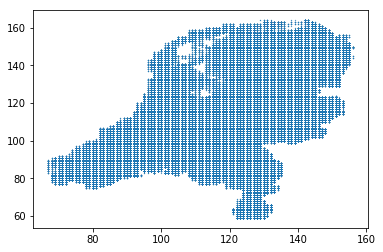

In [145]:
plt.plot(em_a_c2['ix_dstlon'].values, em_a_c2['ix_dstlat'].values, '.', ms=0.2)

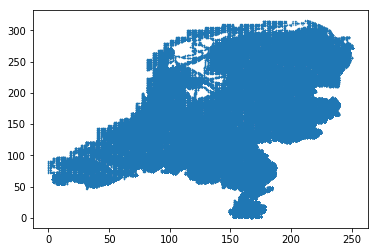

In [146]:
plt.plot(em_a_c2['ix_lon'].values, em_a_c2['ix_lat'].values, '.', ms=0.2)

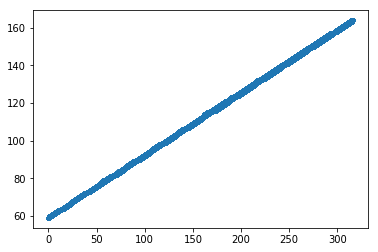

In [149]:
plt.plot(em_a_c2['ix_lat'].values, em_a_c2['ix_dstlat'].values, '.')

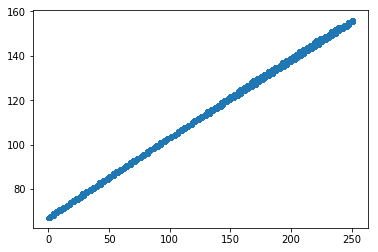

In [150]:
plt.plot(em_a_c2['ix_lon'].values, em_a_c2['ix_dstlon'].values, '.')

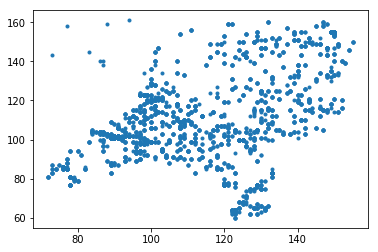

In [152]:
plt.plot(em_p['ix_dstlon'].values, em_p['ix_dstlat'].values, '.')

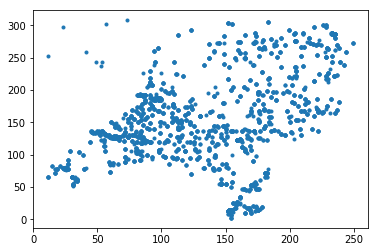

In [151]:
plt.plot(em_p['ix_lon'].values, em_p['ix_lat'].values, '.')

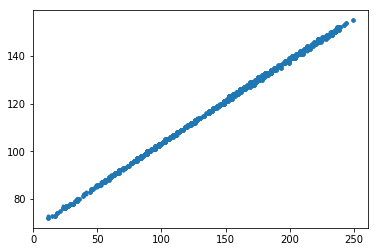

In [49]:
plt.plot(em_p['ix_lon'].values, em_p['ix_dstlon'].values, '.')

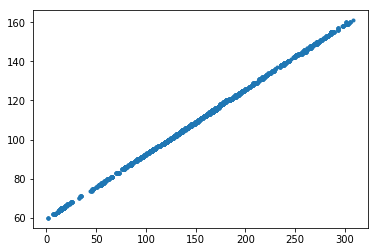

In [50]:
plt.plot(em_p['ix_lat'].values, em_p['ix_dstlat'].values, '.')

In [67]:
import numpy as np
ix_dstgrid = np.arange(1, 7)
ix_dstgrid

array([1, 2, 3, 4, 5, 6])

In [60]:
y, x = np.meshgrid(np.arange(3), np.arange(2))
x[0]

array([0, 0, 0])

In [61]:
x.ravel()

array([0, 0, 0, 1, 1, 1])

In [63]:
y.ravel()

array([0, 1, 2, 0, 1, 2])

In [70]:
y.ravel() + x.ravel() * (y.shape[0] + 1)

array([0, 1, 2, 3, 4, 5])

In [81]:
(ix_dstgrid - 1) % x.shape[1]

array([0, 1, 2, 0, 1, 2])

In [82]:
(ix_dstgrid - 1) // x.shape[1]

array([0, 0, 0, 1, 1, 1])

In [83]:
x.shape

(2, 3)

# Species mapping t-factors

In [1]:
import pandas as pd

In [3]:
SPECIES_MAP_EMEP_TO_TNO = pd.DataFrame(
    {'species_emep': ['CO', 'NH3', 'NOX', 'PM25', 'PMCO', 'SOX', 'VOC', 'VOC'],
     'species_tno': ['CO', 'NH3', 'NOX', 'PM2_5', 'PM_COARSE', 'SO2', 'NMVOC', 'CH4']})

SPECIES_MAP_EMEP_TO_TNO

species_emep species_tno
0           CO          CO
1          NH3         NH3
2          NOX         NOX
3         PM25       PM2_5
4         PMCO   PM_COARSE
5          SOX         SO2
6          VOC       NMVOC
7          VOC         CH4

In [7]:
TESTDATA = pd.DataFrame(
    {'species_emep': ['CO', 'CO', 'PM25', 'PMCO', 'VOC'],
    'values': [1, 2, 3, 4, 5]})
TESTDATA

species_emep  values
0           CO       1
1           CO       2
2         PM25       3
3         PMCO       4
4          VOC       5

In [8]:
TESTDATA.merge(SPECIES_MAP_EMEP_TO_TNO, on='species_emep')

species_emep  values species_tno
0           CO       1          CO
1           CO       2          CO
2         PM25       3       PM2_5
3         PMCO       4   PM_COARSE
4          VOC       5       NMVOC
5          VOC       5         CH4

# Missing emission sources due to temporal factors

## Weekly cycle / daily factors

In [9]:
import dask.dataframe as dd

In [10]:
dfa = dd.read_parquet('/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_TFACT_AFTER.parquet')
dfb = dd.read_parquet('/mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_TFACT_BEFORE.parquet')

ArrowIOError: Failed to open local file: /mnt/home/aether/hilboll/tmp/emiprep-test/data/DEBUG_TFACT_AFTER.parquet

# Numpy array to string

In [11]:
import numpy as np

In [12]:
arr = np.arange(3)

In [13]:
arr.tostring()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00'